In [28]:
from standardInclude import *

In [29]:
path = "./data/Run_2D1/"
dataset = "Run 2-D1"
csv_files = [x for x in os.listdir(path) if "csv" in x]
names = [x.split("_")[len(x.split("_")) -1].split(".csv")[0] for x in csv_files]
print(csv_files)
print(names)
counter = 0

['run_2D1_ctags.csv', 'run_2D1_fillcuts.csv', 'run_2D1_losses.csv']
['ctags', 'fillcuts', 'losses']


In [30]:
dfs = {}
dfs_cut = {}
for i, file in enumerate(csv_files):
    dfi = pandas.read_csv(path+file, header=None)
    dfs[names[i]] = dfi
    print(names[i])
    print(dfi.head())
    print("***************")

ctags
       0  1      2           3   4
0  25894  0  24351   6335910.0  39
1  25894  1  48448  12740600.0  80
2  25894  2  55775  14689800.0  91
3  25894  3  51358  13302500.0  83
4  25894  4  55795  14548600.0  90
***************
fillcuts
       0  1   2    3
0  25894  0  39  111
1  25894  1  80   94
2  25894  2  91  109
3  25894  3  83   95
4  25894  4  90  103
***************
losses
       0  1         2
0  25894  0  0.003695
1  25894  1  0.003758
2  25894  2  0.003938
3  25894  3  0.003937
4  25894  4  0.003960
***************


ctags/t0Val >=  0.0035  and fills >  25  and ctags >  5000  and t0val >  4000000.0


/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


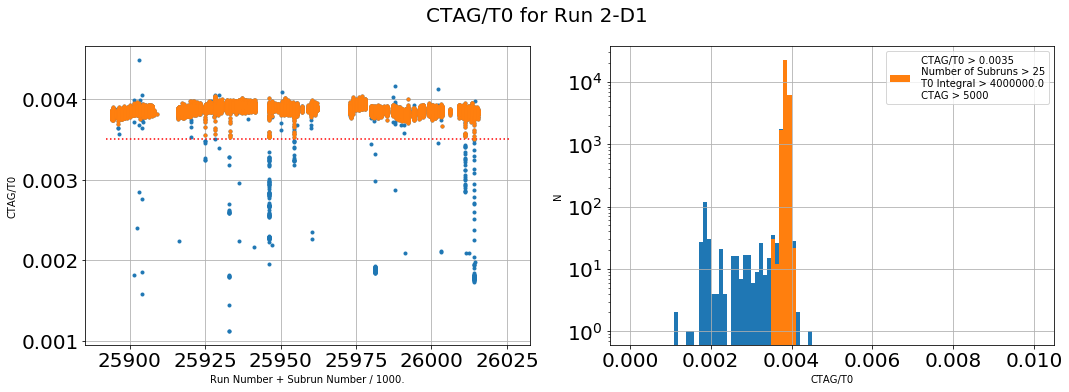

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


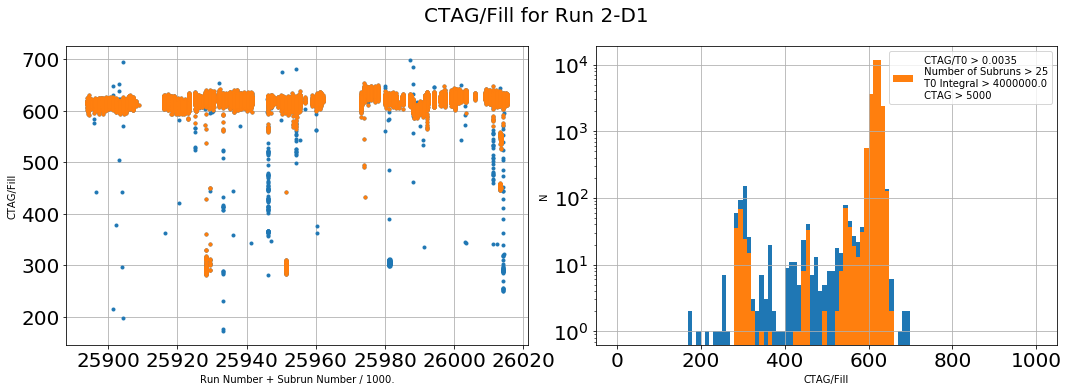

In [31]:
df = dfs['ctags']

ctagPerFillCut = 0.0035
nSubuncut = 25
t0_int_cut = 4e6
ctag_total_cut = 5000

print("ctags/t0Val >= ", ctagPerFillCut," and fills > ", nSubuncut," and ctags > ", ctag_total_cut," and t0val > ", t0_int_cut)

df_cut = df.loc[df[2]/df[3] > ctagPerFillCut].loc[df[4] > nSubuncut].loc[df[2] > ctag_total_cut].loc[df[3] > t0_int_cut]
dfs_cut['ctags'] = df_cut

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[1].hist(df[2]/df[3],bins=100,range=(0,0.01))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,0.01),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/T0 for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/T0")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/T0")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_over_T0.png", bbox_inches='tight')

plt.show()

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[4], ".")
ax[1].hist(df[2]/df[4],bins=100,range=(0,1000))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[4], ".")
ax[1].hist(df_cut[2]/df_cut[4],bins=100,range=(0,1000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/Fill for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/Fill")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/Fill")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill.png", bbox_inches='tight')

plt.show()

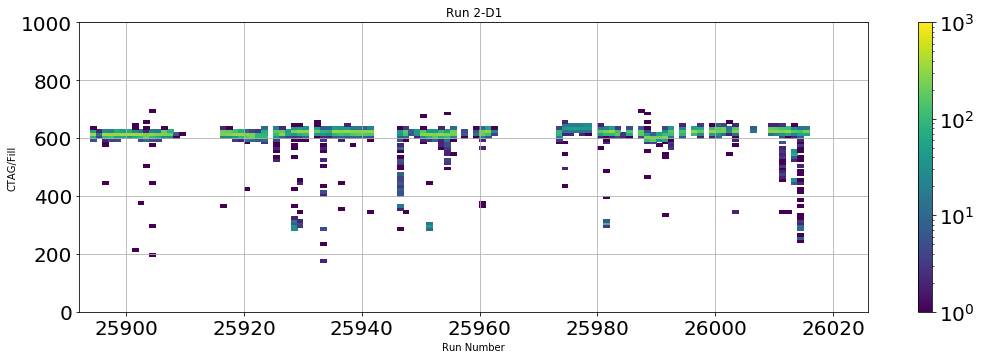

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[4], range=((runstart, runend), (0,1000)),bins=((runend-runstart),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("CTAG/Fill")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill_hist.png", bbox_inches='tight')

plt.show()

fillFraction >= 0.2


/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


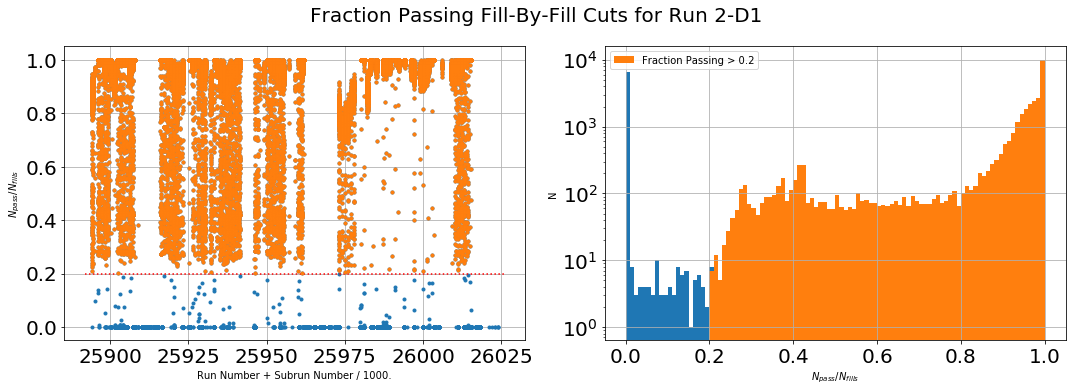

In [33]:
df = dfs['fillcuts']

fraction_passing = 0.2

print("fillFraction >=", fraction_passing)

df_cut = df.loc[df[2]/df[3] > fraction_passing]
dfs_cut['fillcuts'] = df_cut

#    run  | subrun | fills | fills   
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [fraction_passing, fraction_passing], ":", color='red')

ax[1].hist(df[2]/df[3],bins=100,range=(0,1))

ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,1),label=("Fraction Passing > "+str(fraction_passing)))
ax[1].legend()

ax[1].set_yscale("log")
plt.suptitle("Fraction Passing Fill-By-Fill Cuts for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel(r"$N_{pass}/N_{fills}$")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"$N_{pass}/N_{fills}$")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts.png", bbox_inches='tight')

plt.show()

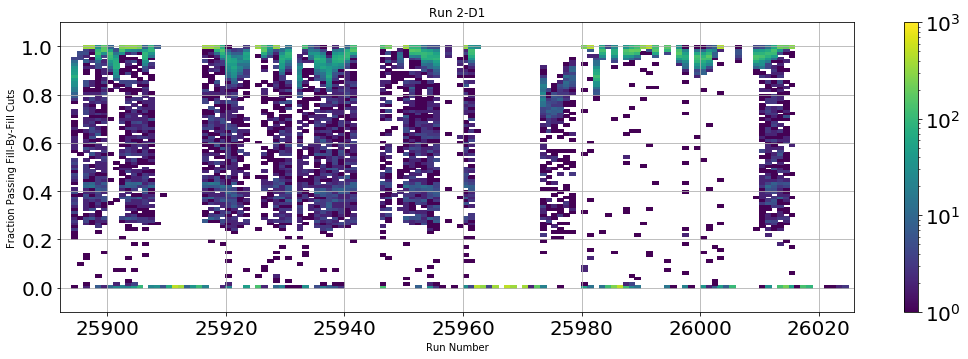

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[3], range=((runstart, runend), (-0.1,1.1)),bins=((runend-runstart),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Fraction Passing Fill-By-Fill Cuts")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts_hist.png", bbox_inches='tight')

plt.show()

lossRatio <=  0.008


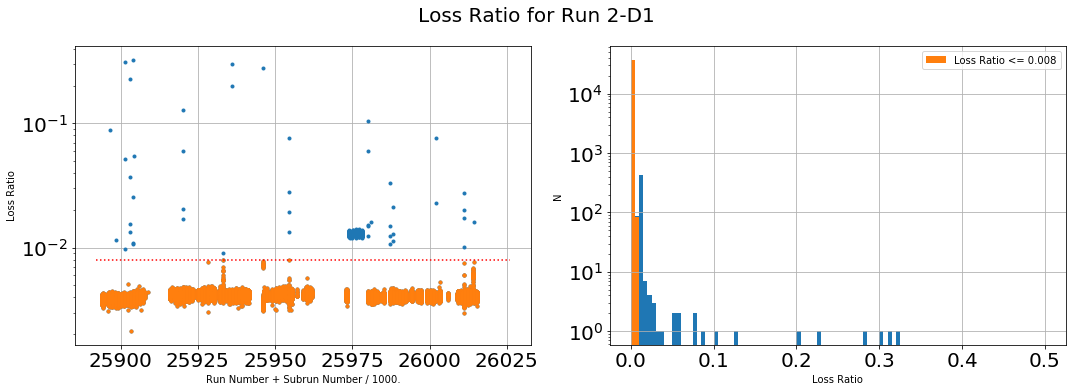

In [35]:
df = dfs['losses']

loss_ratio = 0.008

print("lossRatio <= ",loss_ratio)

df_cut = df.loc[df[2] <= loss_ratio]
dfs_cut['losses'] = df_cut

#      run  | subrun | lossratio  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [loss_ratio, loss_ratio], ":", color='red')

ax[0].set_yscale("log")
ax[1].hist(df[2],bins=100,range=(0,.5))
ax[1].hist(df_cut[2],bins=100,range=(0,.5),label=("Loss Ratio <= "+str(loss_ratio)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Loss Ratio for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("Loss Ratio")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"Loss Ratio")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio.png", bbox_inches='tight')

plt.show()

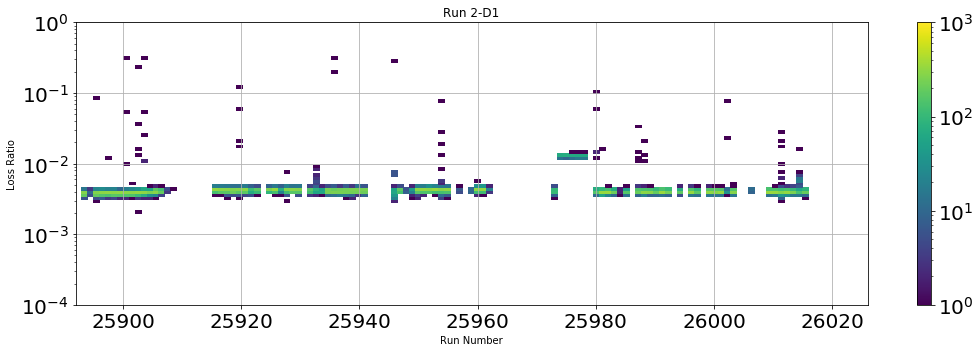

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2

logbins = [ np.linspace(runstart, runend, runend-runstart), 
            np.logspace(-4,0,100)
          ]

plt.hist2d(df[0], df[2], bins=logbins,
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25970, 25980)

plt.colorbar()
plt.yscale("log")
ax.set_xlabel("Run Number")
ax.set_ylabel("Loss Ratio")
plt.title(dataset)
plt.tight_layout()
plt.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio_hist.png", bbox_inches='tight')

plt.show()

---

# Now load global cut information

### Begin with quad cuts

In [53]:
df_quad_bad = pandas.read_csv("./data/Run2_global/quad_cut_run2.txt", header=None, delimiter=" ")
df_quad_bad = df_quad.loc[df_quad_bad[0] > runstart].loc[df_quad_bad[0] < runend]
df_quad_bad.head()

,0,1
21411,25894,318
21412,25894,319
21413,25896,0
21414,25896,1
21415,25896,2


### This dataframe is all of the *bad* cuts, so we need to invert it to make the format compatable with the rest

In [70]:
%%time

df_quad = pandas.DataFrame(dtype=int)
i = 0
for run in range(runstart,runend+1,1):
    for subrun in range(500):
        df_quad = df_quad.append({0:run, 1:subrun}, ignore_index=True)
df_quad.head()

CPU times: user 3min 5s, sys: 3.61 s, total: 3min 9s
Wall time: 3min 12s


,0,1
0,25892.0,0.0
1,25892.0,1.0
2,25892.0,2.0
3,25892.0,3.0
4,25892.0,4.0


In [71]:
# https://kanoki.org/2019/07/04/pandas-difference-between-two-dataframes/
df_quad = pandas.concat([df_quad,df_quad_bad]).drop_duplicates(keep=False)

In [72]:
dfs_cut['quad'] = df_quad

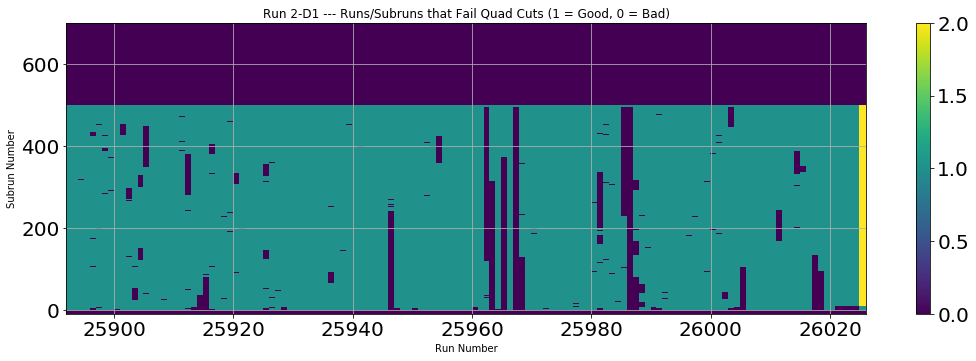

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist2d(df_quad[0], df_quad[1], range=((runstart, runend), (-10,700)),bins=((runend-runstart),710),
          #norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000)
          )
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Subrun Number")
plt.tight_layout()
plt.grid()
plt.title(dataset+" --- Runs/Subruns that Fail Quad Cuts (1 = Good, 0 = Bad)")
plt.savefig("./images/DQC_Images_"+dataset+"QuadCut_hist.png", bbox_inches='tight')

plt.show()

---

### And now the field info

In [39]:
field_path = "/home/jlab/g-2/dqc/data/Run2_global/field/"
field_files = [ x for x in os.listdir(field_path) if "_DQC.csv" in x]
print(field_files)

['6630_6672_DQC.csv', '6780_6841_DQC.csv', '6845_6878_DQC.csv', '6882_6935_DQC.csv', '6944_6985_DQC.csv', '6992_7029_DQC.csv', '7034_7065_DQC.csv', '7082_7104_DQC.csv', '7124_7149_DQC.csv', '7152_7188_DQC.csv', '7190_7213_DQC.csv', '7217_7249_DQC.csv', '7255_7291_DQC.csv', '7394_7429_DQC.csv', '7434_7466_DQC.csv', '7479_7512_DQC.csv', '7520_7546_DQC.csv', '7610_7636_DQC.csv', '7677_7697_DQC.csv', '7844_7874_DQC.csv']


In [40]:
df_field = pandas.DataFrame()
for file in field_files:
    dfi= pandas.read_csv(field_path+file)
    #print(dfi.head())
    df_field = df_field.append(dfi, ignore_index=True)
    #break
df_field = df_field.loc[df_field['run'] > runstart].loc[df_field['run'] < runend]

dfs_cut['field'] = df_field.loc[df_field['field status'] ==  0]

In [41]:
df_field.head()

,run,subrun,field status
94392,25893,0,0
94393,25893,1,0
94394,25893,2,0
94395,25893,3,0
94396,25893,4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f489a32d240>]],
      dtype=object)

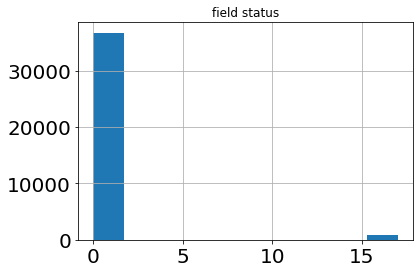

In [42]:
df_field.hist('field status')

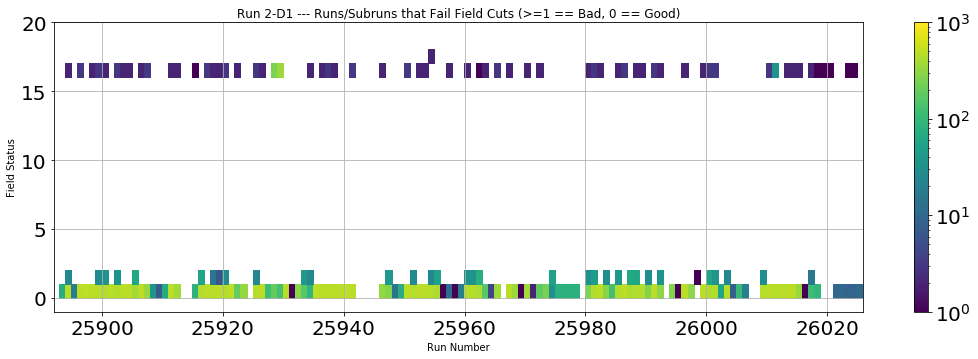

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist2d(df_field['run'], df_field['field status'], range=((runstart, runend), (-1,20)),bins=((runend-runstart),21),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000)
          )
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Field Status")
plt.tight_layout()
plt.grid()
plt.title(dataset+" --- Runs/Subruns that Fail Field Cuts (>=1 == Bad, 0 == Good)")
plt.savefig("./images/DQC_Images_"+dataset+"FieldCut_hist.png", bbox_inches='tight')

plt.show()

---

# And now lets combine all of the data into one dataframe

In [74]:
#lets use the pandas inner join method; https://datacarpentry.org/python-ecology-lesson/05-merging-data/
for i, name in enumerate(dfs_cut):
    dfi = dfs_cut[name]
    print(name)
    print(dfi.head())
    
    for col in dfi.columns:
        dfi[str(col)+"_"+name] = dfi[col]
    
    #create unique id column for each run/subrun
    try:
        dfi['unique id'] = dfi[0]*1000 + dfi[1]
    except:
        dfi['unique id'] = dfi['run']*1000 + dfi['subrun']
        
    #combine them together using an inner join on the unique id
    if(i == 0):
        df_merged = dfi
    else:
        df_merged = pandas.merge(left=df_merged, right=dfi, left_on='unique id', right_on='unique id', suffixes=("", name))


df_merged.head()

ctags
       0  1      2           3   4  0_ctags  1_ctags  2_ctags     3_ctags  \
0  25894  0  24351   6335910.0  39    25894        0    24351   6335910.0   
1  25894  1  48448  12740600.0  80    25894        1    48448  12740600.0   
2  25894  2  55775  14689800.0  91    25894        2    55775  14689800.0   
3  25894  3  51358  13302500.0  83    25894        3    51358  13302500.0   
4  25894  4  55795  14548600.0  90    25894        4    55795  14548600.0   

   4_ctags  unique id  0_ctags_ctags  1_ctags_ctags  2_ctags_ctags  \
0       39   25894000          25894              0          24351   
1       80   25894001          25894              1          48448   
2       91   25894002          25894              2          55775   
3       83   25894003          25894              3          51358   
4       90   25894004          25894              4          55795   

   3_ctags_ctags  4_ctags_ctags  unique id_ctags  
0      6335910.0             39         25894000  
1     12

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


losses
       0  1         2  0_losses  1_losses  2_losses  unique id  \
0  25894  0  0.003695     25894         0  0.003695   25894000   
1  25894  1  0.003758     25894         1  0.003758   25894001   
2  25894  2  0.003938     25894         2  0.003938   25894002   
3  25894  3  0.003937     25894         3  0.003937   25894003   
4  25894  4  0.003960     25894         4  0.003960   25894004   

   0_losses_losses  1_losses_losses  2_losses_losses  unique id_losses  
0            25894                0         0.003695          25894000  
1            25894                1         0.003758          25894001  
2            25894                2         0.003938          25894002  
3            25894                3         0.003937          25894003  
4            25894                4         0.003960          25894004  
field
         run  subrun  field status  run_field  subrun_field  \
94392  25893       0             0      25893             0   
94393  25893       1      

,0,1,2,3,4,0_ctags,1_ctags,2_ctags,3_ctags,4_ctags,...,field status_field_field,unique id_field,run_field_field_field,subrun_field_field_field,field status_field_field_field,unique id_field_field,0quad,1quad,0_quad,1_quad
0,25894,0,24351,6335910.0,39,25894,0,24351,6335910.0,39,...,0,25894000,25894,0,0,25894000,25894.0,0.0,25894.0,0.0
1,25894,1,48448,12740600.0,80,25894,1,48448,12740600.0,80,...,0,25894001,25894,1,0,25894001,25894.0,1.0,25894.0,1.0
2,25894,2,55775,14689800.0,91,25894,2,55775,14689800.0,91,...,0,25894002,25894,2,0,25894002,25894.0,2.0,25894.0,2.0
3,25894,3,51358,13302500.0,83,25894,3,51358,13302500.0,83,...,0,25894003,25894,3,0,25894003,25894.0,3.0,25894.0,3.0
4,25894,4,55795,14548600.0,90,25894,4,55795,14548600.0,90,...,0,25894004,25894,4,0,25894004,25894.0,4.0,25894.0,4.0


In [75]:
df_merged.columns

Index([                             '0',                              '1',
                                    '2',                              '3',
                                      4,                        '0_ctags',
                              '1_ctags',                        '2_ctags',
                              '3_ctags',                        '4_ctags',
                            'unique id',                  '0_ctags_ctags',
                        '1_ctags_ctags',                  '2_ctags_ctags',
                        '3_ctags_ctags',                  '4_ctags_ctags',
                      'unique id_ctags',            '0_ctags_ctags_ctags',
                  '1_ctags_ctags_ctags',            '2_ctags_ctags_ctags',
                  '3_ctags_ctags_ctags',            '4_ctags_ctags_ctags',
                'unique id_ctags_ctags',                      '0fillcuts',
                            '1fillcuts',                      '2fillcuts',
                         

---

# And now create versions of the above plots which pass all of the cuts

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


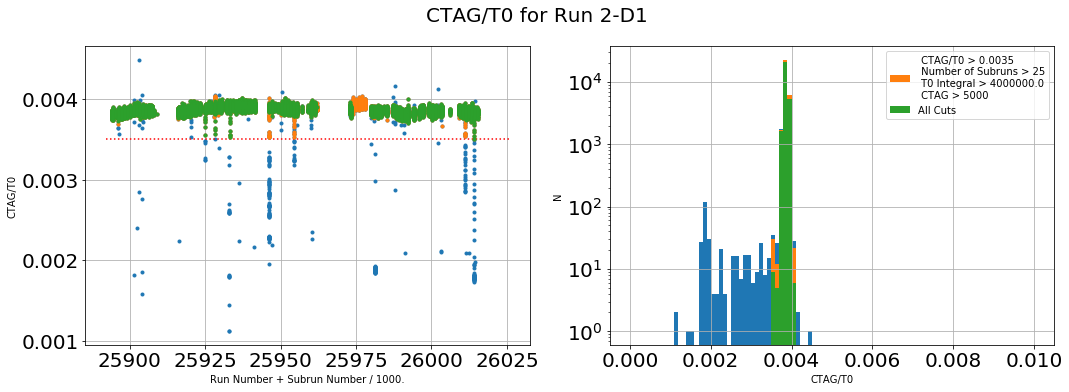

In [76]:
name = 'ctags'
df = dfs[name]
df_cut = dfs_cut[name]

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[0].plot(df_merged["0"+"_"+name]+df_merged["1"+"_"+name]/1000., df_merged["2_"+name]/df_merged["3"+"_"+name], ".")


ax[1].hist(df[2]/df[3],bins=100,range=(0,0.01))
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,0.01),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].hist(df_merged["2_"+name]/df_merged["3_"+name],bins=100,range=(0,0.01),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/T0 for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/T0")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/T0")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_over_T0_allCuts.png", bbox_inches='tight')

plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


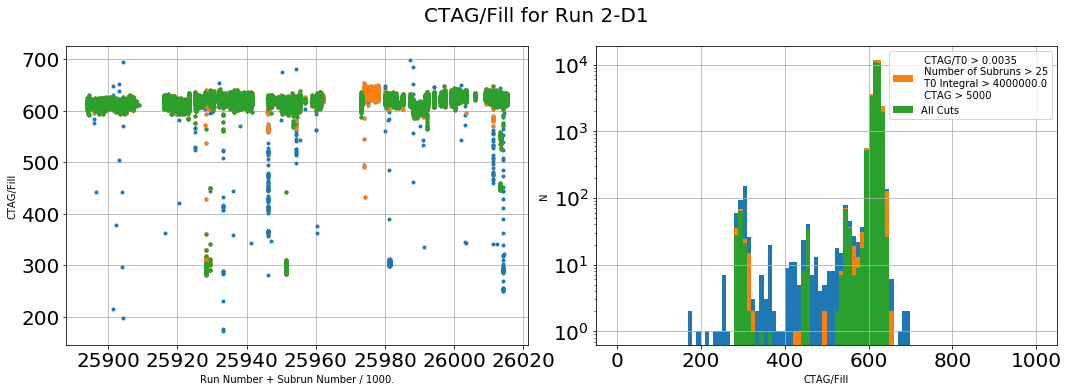

In [77]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[4], ".")
ax[1].hist(df[2]/df[4],bins=100,range=(0,1000))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[4], ".")
ax[1].hist(df_cut[2]/df_cut[4],bins=100,range=(0,1000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name]/df_merged["4_"+name], ".")
ax[1].hist(df_merged["2_"+name]/df_merged["4_"+name],bins=100,range=(0,1000),label=("All Cuts"))

ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/Fill for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/Fill")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/Fill")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill_allCuts.png", bbox_inches='tight')

plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


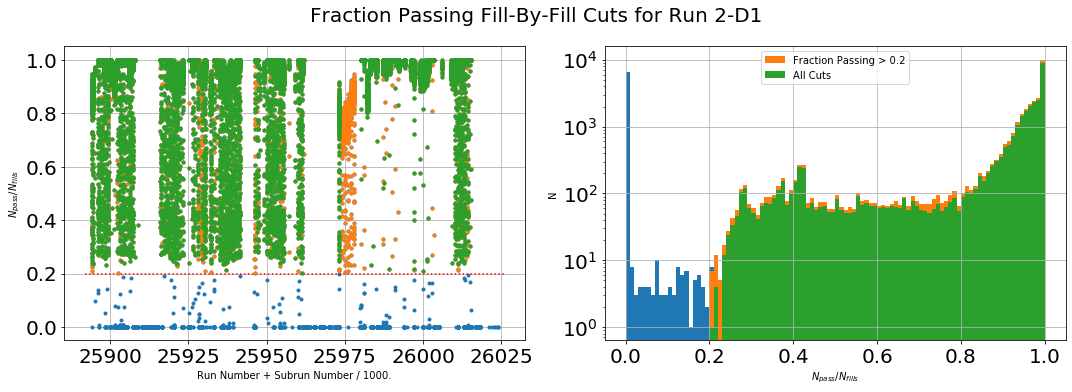

In [78]:
name = 'fillcuts'
df = dfs[name]
df_cut = dfs_cut[name]

#    run  | subrun | fills | fills   
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [fraction_passing, fraction_passing], ":", color='red')

ax[1].hist(df[2]/df[3],bins=100,range=(0,1))

ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,1),label=("Fraction Passing > "+str(fraction_passing)))

ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name]/df_merged["3_"+name], ".")
ax[1].hist(df_merged["2_"+name]/df_merged["3_"+name],bins=100,range=(0,1),label=("All Cuts"))

ax[1].legend()

ax[1].set_yscale("log")
plt.suptitle("Fraction Passing Fill-By-Fill Cuts for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel(r"$N_{pass}/N_{fills}$")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"$N_{pass}/N_{fills}$")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts_allCuts.png", bbox_inches='tight')

plt.show()

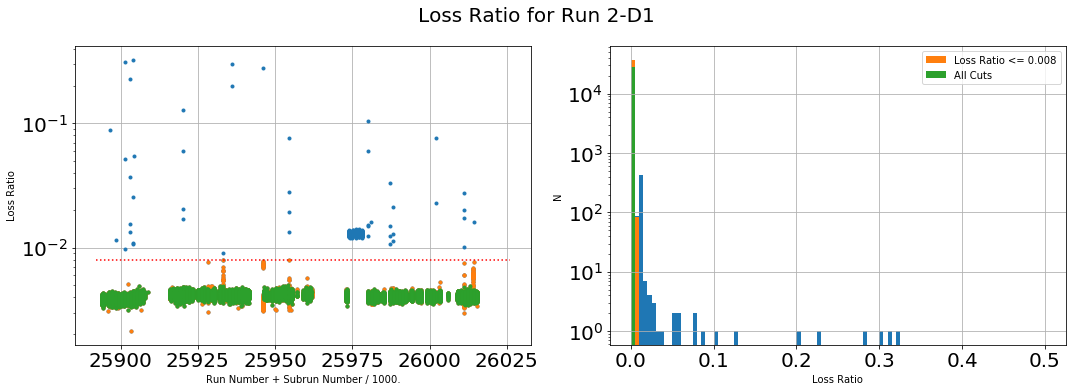

In [79]:
name = 'losses'
df = dfs[name]
df_cut = dfs_cut[name]

#      run  | subrun | lossratio  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot(df_merged["0_"+name]+df_merged["1_"+name]/1000., df_merged["2_"+name], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [loss_ratio, loss_ratio], ":", color='red')

ax[0].set_yscale("log")
ax[1].hist(df[2],bins=100,range=(0,.5))
ax[1].hist(df_cut[2],bins=100,range=(0,.5),label=("Loss Ratio <= "+str(loss_ratio)))
ax[1].hist(df_merged["2_"+name],bins=100,range=(0,.5),label=("All Cuts"))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Loss Ratio for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("Loss Ratio")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"Loss Ratio")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio_allCuts.png", bbox_inches='tight')

plt.show()